In [16]:
#Campeonato Quantamental

import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt


tickers = ['AMZN']
start_date = '2010-01-01'
end_date = '2019-12-31'
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)
df = panel_data['Close']
df

Symbols,AMZN
Date,
2010-01-04,133.899994
2010-01-05,134.690002
2010-01-06,132.250000
2010-01-07,130.000000
2010-01-08,133.520004
...,...
2019-12-24,1789.209961
2019-12-26,1868.770020
2019-12-27,1869.800049


In [17]:
#calculo indicador
def bollinger_backtest(frame):
    tickers = frame.columns.values.tolist()
    for t in tickers:
        frame[t + '_sma200'] = frame.rolling(200).mean()[t]
        frame[t + '_bsuperior'] = frame[t + '_sma200'] + 2*(frame.rolling(200).std())[t]
        frame[t + '_binferior'] = frame[t + '_sma200'] - 2*(frame.rolling(200).std())[t]
    return frame

df = bollinger_backtest(df)
df = df = df.dropna() 
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Symbols,AMZN,AMZN_sma200,AMZN_bsuperior,AMZN_binferior
Date,,,,
2010-10-18,163.559998,130.500000,155.071176,105.928825
2010-10-19,158.669998,130.623850,155.511585,105.736115
2010-10-20,158.669998,130.743750,155.939385,105.548115
2010-10-21,164.970001,130.907350,156.563018,105.251682
2010-10-22,169.130005,131.103000,157.321488,104.884512
...,...,...,...,...
2019-12-24,1789.209961,1823.850699,1976.538889,1671.162509
2019-12-26,1868.770020,1824.740499,1976.382456,1673.098542
2019-12-27,1869.800049,1825.658399,1976.147668,1675.169130


In [26]:
#logico
import numpy as np

def buy_sell(df): 
  compras = []
  vendas = []
  flag = 3
  #flag = 1 comprado
  #flag = 0 vendeu

  for i in range(len(df)):
    if df['AMZN'][i] < df['AMZN_binferior'][i]:   
      if flag != 1:
        compras.append(df['AMZN'][i])
        vendas.append(np.nan)
        flag = 1
      else:
        compras.append(np.nan)
        vendas.append(np.nan)

    elif (df['AMZN'][i] > df['AMZN_bsuperior'][i]):
      if ((flag != 0) & (flag != 3)):
        compras.append(np.nan)
        vendas.append(df['AMZN'][i])
        flag = 0
      else:
        compras.append(np.nan)
        vendas.append(np.nan)

    else:
      compras.append(np.nan)
      vendas.append(np.nan)
        
  return (compras, vendas)

In [27]:
buy_sell = buy_sell(df)
df['compra'] = buy_sell[0]
df['venda'] = buy_sell[1]
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Symbols,AMZN,AMZN_sma200,AMZN_bsuperior,AMZN_binferior,compra,venda
Date,,,,,,
2010-10-18,163.559998,130.500000,155.071176,105.928825,NaN,NaN
2010-10-19,158.669998,130.623850,155.511585,105.736115,NaN,NaN
2010-10-20,158.669998,130.743750,155.939385,105.548115,NaN,NaN
2010-10-21,164.970001,130.907350,156.563018,105.251682,NaN,NaN
2010-10-22,169.130005,131.103000,157.321488,104.884512,NaN,NaN
...,...,...,...,...,...,...
2019-12-24,1789.209961,1823.850699,1976.538889,1671.162509,NaN,NaN
2019-12-26,1868.770020,1824.740499,1976.382456,1673.098542,NaN,NaN
2019-12-27,1869.800049,1825.658399,1976.147668,1675.169130,NaN,NaN


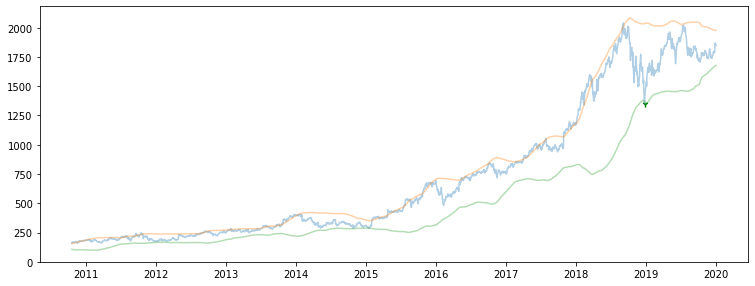

In [29]:
"""plt.plot(df['MMM'])
plt.plot(df['MMM_bsuperior'])
plt.plot(df['MMM_binferior'])
plt.scatter(compras, range(len(df[ticker])), marker='^')
plt.scatter(vendas,range(len(df[ticker])),  marker='o')"""

plt.figure(figsize=(12.7,4.7))
plt.plot(df['AMZN'], label = 'Preço', alpha = 0.35)
plt.plot(df['AMZN_bsuperior'], label = 'supeferior',alpha = 0.35)
plt.plot(df['AMZN_binferior'], label = 'inferior',alpha = 0.35)
plt.scatter(df.index, df['compra'], label = 'Buy', marker="1",color = 'green') #plt scatter(x,y,label,color)
plt.scatter(df.index, df['venda'], label = 'Sell',marker="v",color = 'red')
